# Forecast the Virat Kholi's Avg using S/R as regressor

In [75]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error

In [164]:
data = pd.read_csv('Virat Kohli - One Day Internationals - Performance Analysis by Year - Sheet1.csv')

In [165]:
data

,Year,Mat,Inns,NO,100s,50s,0s,HS,Runs,Avg,S/R,Ca,St
0,2008,5,5,0,0,1,0,54,159,31.80,66.53,3,0
1,2009,10,8,2,1,2,0,107,325,54.17,84.42,4,0
2,2010,25,24,3,3,7,3,118,995,47.38,85.12,9,0
3,2011,34,34,5,4,8,2,117,1381,47.62,85.56,19,0
4,2012,17,17,2,5,3,1,183,1026,68.40,93.78,14,0
5,2013,34,30,6,4,7,3,115*,1268,52.83,97.54,11,0
6,2014,21,20,2,4,5,1,139*,1054,58.56,99.62,8,0
7,2015,20,20,3,2,1,0,138,623,36.65,80.60,11,0
8,2016,10,10,2,3,4,0,154*,739,92.38,100.00,6,0
9,2017,26,26,7,6,7,2,131,1460,76.84,99.12,9,0


In [166]:
df = data[:-1]

In [167]:
# create data frame with needed columns
df = df[['Year', 'Avg', 'S/R']]

In [168]:
df['Year'] = pd.to_datetime(df['Year'])

In [169]:
df = df.rename(columns={'Avg': 'y', 'Year': 'ds'})

In [170]:
df

,ds,y,S/R
0,2008-01-01,31.80,66.53
1,2009-01-01,54.17,84.42
2,2010-01-01,47.38,85.12
3,2011-01-01,47.62,85.56
4,2012-01-01,68.40,93.78
5,2013-01-01,52.83,97.54
6,2014-01-01,58.56,99.62
7,2015-01-01,36.65,80.60
8,2016-01-01,92.38,100.00
9,2017-01-01,76.84,99.12


In [171]:
df['y_orig'] = df['y'] # to save a copy of the original data.
df['y'] = np.log(df['y'])

In [172]:
fut_df = df.copy()

In [174]:
fut_df

,ds,y,S/R,y_orig
0,2008-01-01,3.459466,66.53,31.80
1,2009-01-01,3.992127,84.42,54.17
2,2010-01-01,3.858200,85.12,47.38
3,2011-01-01,3.863253,85.56,47.62
4,2012-01-01,4.225373,93.78,68.40
5,2013-01-01,3.967079,97.54,52.83
6,2014-01-01,4.070052,99.62,58.56
7,2015-01-01,3.601413,80.60,36.65
8,2016-01-01,4.525911,100.00,92.38
9,2017-01-01,4.341725,99.12,76.84


In [175]:
model = Prophet()
model.add_regressor('S/R')

In [176]:
model.fit(df)
future_data = model.make_future_dataframe(periods=1, freq='Y')

14:14:11 - cmdstanpy - INFO - Chain [1] start processing
14:14:11 - cmdstanpy - INFO - Chain [1] done processing


In [177]:
future_data.tail(5)

,ds
11,2019-01-01
12,2020-01-01
13,2021-01-01
14,2022-01-01
15,2022-12-31


In [179]:
fut_df.drop('y', inplace=True, axis=1)

In [180]:
fut_df.drop('y_orig', inplace=True, axis=1)

In [181]:
fut_df

,ds,S/R
0,2008-01-01,66.53
1,2009-01-01,84.42
2,2010-01-01,85.12
3,2011-01-01,85.56
4,2012-01-01,93.78
5,2013-01-01,97.54
6,2014-01-01,99.62
7,2015-01-01,80.60
8,2016-01-01,100.00
9,2017-01-01,99.12


In [183]:
df

,ds,y,S/R,y_orig
0,2008-01-01,3.459466,66.53,31.80
1,2009-01-01,3.992127,84.42,54.17
2,2010-01-01,3.858200,85.12,47.38
3,2011-01-01,3.863253,85.56,47.62
4,2012-01-01,4.225373,93.78,68.40
5,2013-01-01,3.967079,97.54,52.83
6,2014-01-01,4.070052,99.62,58.56
7,2015-01-01,3.601413,80.60,36.65
8,2016-01-01,4.525911,100.00,92.38
9,2017-01-01,4.341725,99.12,76.84


In [184]:
new_row = {'ds':'2022-12-31', 'S/R':87.9436} #S/R had been forecasted
new_fut_df = fut_df.append(new_row, ignore_index=True)

<ipython-input-184-c1fbcca40c80>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_fut_df = fut_df.append(new_row, ignore_index=True)


In [185]:
new_fut_df['ds'] = pd.to_datetime(new_fut_df['ds'])

In [186]:
new_fut_df

,ds,S/R
0,2008-01-01,66.5300
1,2009-01-01,84.4200
2,2010-01-01,85.1200
3,2011-01-01,85.5600
4,2012-01-01,93.7800
5,2013-01-01,97.5400
6,2014-01-01,99.6200
7,2015-01-01,80.6000
8,2016-01-01,100.0000
9,2017-01-01,99.1200


In [187]:
forecast_data = model.predict(new_fut_df)

In [188]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
11,2019-01-01,4.112794,3.853135,4.395046
12,2020-01-01,3.986108,3.729510,4.284971
13,2021-01-01,3.603377,3.352121,3.874928
14,2022-01-01,3.607305,3.351419,3.883991
15,2022-12-31,4.071327,3.820965,4.349333


In [189]:
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,S/R,S/R_lower,S/R_upper,additive_terms,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-01-01,1.445371,3.055397,3.571473,1.445371,1.445371,-0.959448,-0.959448,-0.959448,1.869899,...,-0.959448,-0.959448,-0.959448,2.829347,2.829347,2.829347,0.0,0.0,0.0,3.315269
1,2009-01-01,1.415194,3.614700,4.138023,1.415194,1.415194,-0.242587,-0.242587,-0.242587,2.463009,...,-0.242587,-0.242587,-0.242587,2.705596,2.705596,2.705596,0.0,0.0,0.0,3.878203
2,2010-01-01,1.385100,3.607960,4.147857,1.385100,1.385100,-0.214538,-0.214538,-0.214538,2.507048,...,-0.214538,-0.214538,-0.214538,2.721586,2.721586,2.721586,0.0,0.0,0.0,3.892148
3,2011-01-01,1.355005,3.653312,4.184661,1.355005,1.355005,-0.196906,-0.196906,-0.196906,2.565946,...,-0.196906,-0.196906,-0.196906,2.762853,2.762853,2.762853,0.0,0.0,0.0,3.920951
4,2012-01-01,1.324911,4.037951,4.557649,1.324911,1.324911,0.132473,0.132473,0.132473,2.961820,...,0.132473,0.132473,0.132473,2.829347,2.829347,2.829347,0.0,0.0,0.0,4.286731
5,2013-01-01,1.294734,3.983581,4.559881,1.294734,1.294734,0.283138,0.283138,0.283138,2.988734,...,0.283138,0.283138,0.283138,2.705596,2.705596,2.705596,0.0,0.0,0.0,4.283469
6,2014-01-01,1.264640,4.073123,4.622005,1.264640,1.264640,0.366485,0.366485,0.366485,3.088070,...,0.366485,0.366485,0.366485,2.721586,2.721586,2.721586,0.0,0.0,0.0,4.352711
7,2015-01-01,1.234546,3.322182,3.888321,1.234546,1.234546,-0.395656,-0.395656,-0.395656,2.367196,...,-0.395656,-0.395656,-0.395656,2.762853,2.762853,2.762853,0.0,0.0,0.0,3.601742
8,2016-01-01,1.204452,4.146757,4.683271,1.204452,1.204452,0.381712,0.381712,0.381712,3.211059,...,0.381712,0.381712,0.381712,2.829347,2.829347,2.829347,0.0,0.0,0.0,4.415510
9,2017-01-01,1.174275,3.970355,4.507814,1.174275,1.174275,0.346450,0.346450,0.346450,3.052046,...,0.346450,0.346450,0.346450,2.705596,2.705596,2.705596,0.0,0.0,0.0,4.226321


C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


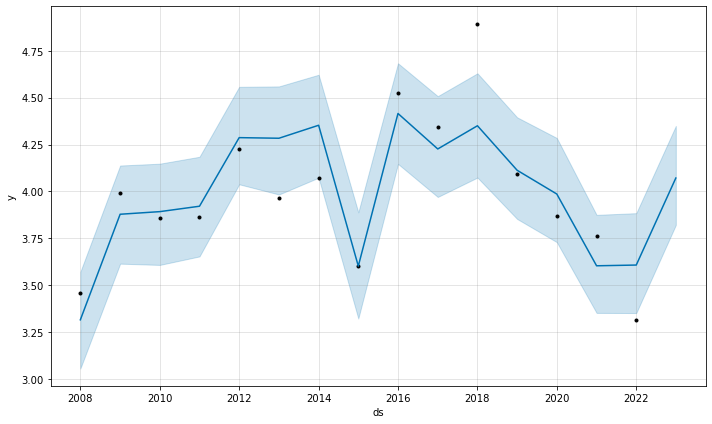

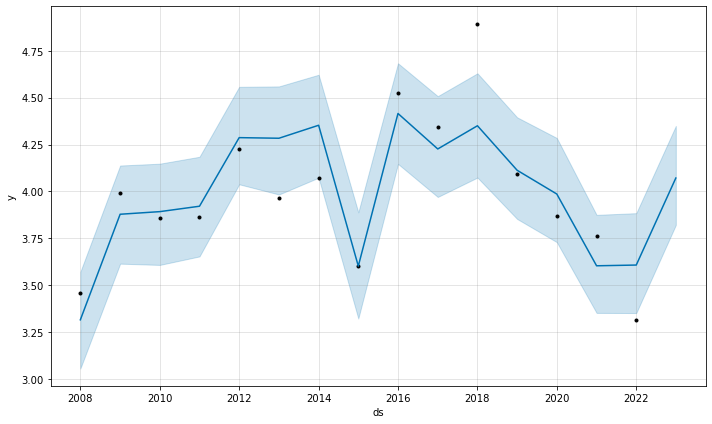

In [190]:
model.plot(forecast_data)

C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


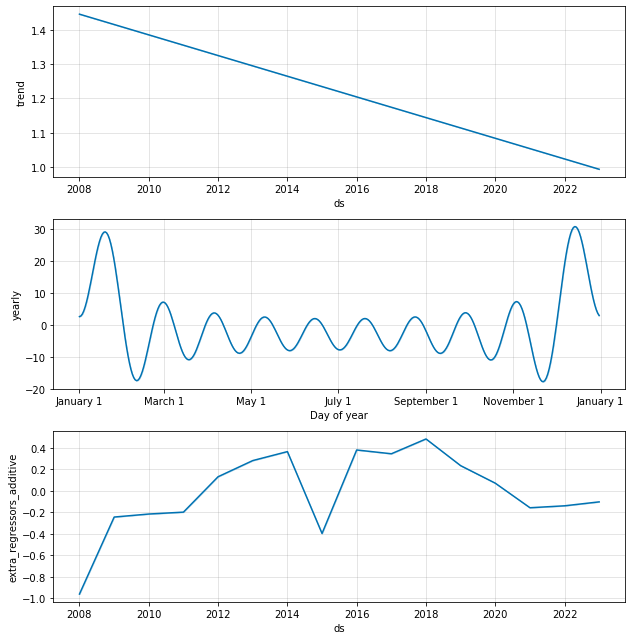

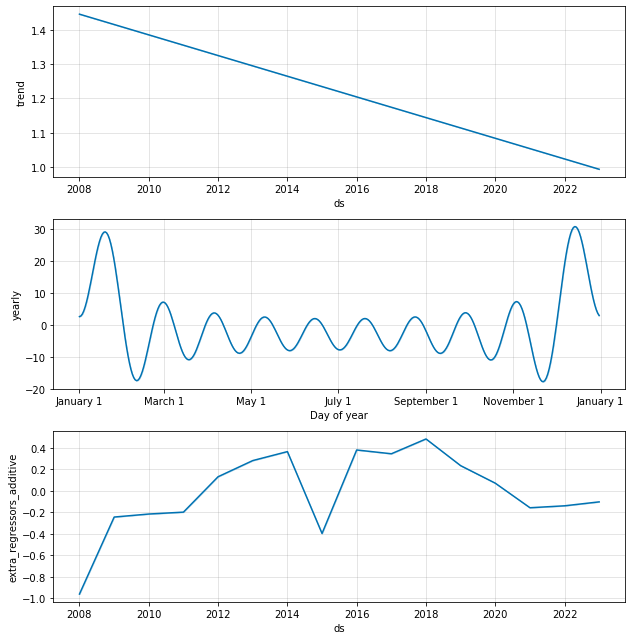

In [191]:
model.plot_components(forecast_data)

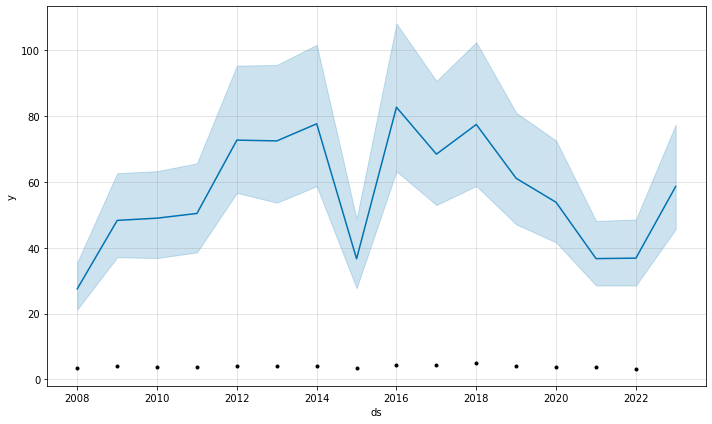

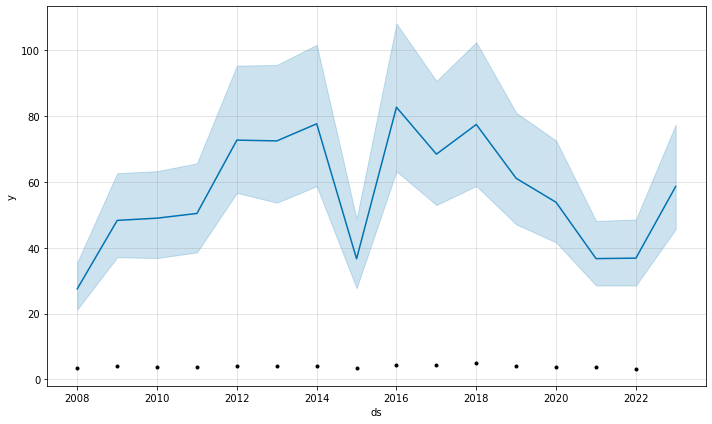

In [192]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

model.plot(forecast_data_orig)

In [193]:
df['y_log']=df['y'] #copy the log-transformed data to another column
df['y']=df['y_orig']

In [194]:
final_df = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'